# GenSpace Workshop for Personalized Medicine
### Date: July 26th, 2020
### Objective: How to calculate Polygenic Risk Scores (PRS) to understand SSRI response
### Facilitator: [Kumar Veerapen, PhD](mailto:veerapen@broadinstitute.org) and [Caitlin Cooney, CGC](mailto:caitcooney@gmail.com)
_Creation of this hands-on workshop material is thanks to the inspiration from materials provided by Laramie Duncan, PhD, and Hanyang Shen, MS, Stanford University._

_Materials from this notebook is complementary from the lecture slides found [here](https://docs.google.com/presentation/d/1kVnEgBtYxORmRk_0A0i6PXd2kX7XGYgHHg3rWw1vUCw/edit?usp=sharing)_

## Learning objectives

1) To learn basic commands in Jupyter notebooks

2) To understand the calculation of PRS

3) To determine association of PRS to a genetic trait of interest

3) To define statistical limitations of PRS

4) To figure out what is considered a best fit PRS model

## What is Polygenic Risk Score (PRS)?

An area in genetics that has large traction is understanding polygenicity of genetic traits. In recent years genome-wide association studies (GWAS) have discovered thousands of genetic variants associated both with diseases (depression, heart disease) and complex traits (height). Complex traits are traits derived from multiple genes, and exhibit a large range of attributes. 

Polygenic risk scores evaluate these variants to help provide a personalized and more accurate risk/prediction assessment such as depression and height. The term PRS is synonymous with Genomic Risk Scores (GRS), Risk Profile Scores (RPS), or simply genetic scores. 

Despite being a trendy method in understanding genetic traits, these scores are far from perfect. The PRS that have been published thus far usually tend to explain less than [20% of a trait variance in complex traits](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-018-0610-x). 

There are strengths and weaknesses to utilize PRS which are covered in the lecture session of this hands-on workshop. 

## What are we doing? 

This hand-on workshop will allow you to explore a conventional approach to computing PRS using a ubiquitous genetics tool called [PLINK](http://www.cog-genomics.org/plink2/). 

**Problem statement**: Scientifically, we know that approx [53-65% of patients with depression respond well to antidepressants](https://europepmc.org/article/med/10362442). 

**Hypothesis**: We hypothesize that this variability is potentially caused by genetic risk.

**Scientific question/objective**:  Are individuals with higher depression PRS more responsive to selective serotonin reuptake inhibitors (SSRI) [a type of antidepressant]?

## Step by step overview

### First... 
_We will obtain a reference data that contains effect sizes needed for calculating PRS._


_Effect size_ : a statistical concept that measures the strength of the relationship between two variables on a numeric scale.  
_Example_ : If we look at a population’s height, on average men are taller than women. This difference between the height of men and the height of women is known as the effect size.  If the effect size is high, there is a higher height difference between men and women. If the effect size is small, there is less height difference. 

The effect sizes (or summary statistics) that we will be using were generated from a reference data published by [David Howard and co in _Nature Neuroscience_ (2019)](https://www.nature.com/articles/s41593-018-0326-7). Their study attempted to understand the genetic risk of major depressive disorder in a very large collection of depressed patients. The reference data from this paper will contain  effect sizes that we will need to calculate PRS in our test data which is a modified version of the 1000 Genomes Project.

[The 1000 Genomes Project ran between 2008 and 2015, creating the largest public catalogue of human variation and genotype data](https://www.internationalgenome.org/about)

&emsp; In this project, variation means to look for polymorphisms (genetic variants with frequencies of at least 1% in the populations studied)

### Second...
_We will calculate the PRS to answer our scientific question (refer to previous cell)._

Using the effect sizes from our reference data (Howard et al 2019), we will then calculate PRS from samples obtained from a modified version of the 1000 Genomes data on a binary trait called selective serotonin reuptake inhibitor (SSRI) response. An SSRI is a typical group of antidepressants prescribed to patients with depressive symptoms.

The trait that you are analysing was simulated where

**1** =the individual did not show an improvement in their depressive symptoms (measured by depression scores)

**2** = the individual showed an improvement in their depressive symptoms (measured by depression scores)

### Third...
_We will use the PRS calculation to find an association to the trait that we are testing -- SSRI response._

Finally, we will then use a statistical programming tool called R in order to 1) analyse the PRS generated; and 2) visualize our PRS using plots.

In order to provide a little understanding of the code that we are running, we have included some details in the comment section of your workshop. 

Let’s start with finding out how to use Jupyter notebook in order to run your analysis.

## Using Jupyter
### Running cells
Evaluate cells using SHIFT + ENTER. Select the next cell and run it

In [1]:
print('Hello, world')

[1] "Hello, world"


### Modes

Jupyter has two modes, a **navigation mode** and an **editor mode**.

#### Navigation mode:

 - <font color="blue"><strong>BLUE</strong></font> cell borders
 - `UP` / `DOWN` move between cells
 - `ENTER` while a cell is selected will move to **editing mode**.
 - Many letters are keyboard shortcuts! This is a common trap.
 
#### Editor mode:

 - <font color="green"><strong>GREEN</strong></font> cell borders
 - `UP` / `DOWN`/ move within cells before moving between cells.
 - `ESC` will return to **navigation mode**.
 - `SHIFT + ENTER` will evaluate a cell and return to **navigation mode**.

### Cell types

There are several types of cells in Jupyter notebooks. The two you will see here are **Markdown** (text) and **Code**.

In [2]:
# This is a code cell
my_variable = 5

**This is a markdown cell**, so even if something looks like code (as below), it won't get executed!

my_variable += 1

### Tips and tricks

Keyboard shortcuts:

 - `SHIFT + ENTER` to evaluate a cell
 - `ESC` to return to navigation mode
 - `y` to turn a markdown cell into code
 - `m` to turn a code cell into markdown
 - `a` to add a new cell **above** the currently selected cell
 - `b` to add a new cell **below** the currently selected cell
 - `d, d` (repeated) to delete the currently selected cell
 - `TAB` to activate code completion
 
To try this out, create a new cell below this one using `b`, and print `my_variable` by starting with `print(my` and pressing `TAB`!

## Set up R environment with packages that you will need

[R is a statistical programming tool](https://www.r-project.org/) (that's free) is a tool that many analysts use in order to analyse their datasets. This is especially true in genetics where we are cheap with buying software and analytic tools. With R, you can set up your environment to get additional tools to run some of your analyses. 

The common practice in R is to load all of your needed tools (called packages) at the beginning of your script, i.e. the next line.

`fmsb` will be used in order to calculate the variance explained by the PRS that you will be computing
The first line here, downloads the package into your environment.

Let's load the package into your environment now

In [3]:
library(fmsb)

When you want to look up a function in R, you can use a `?` sign

# Let’s get started! 
## Step 0: Exploration of your files and directories

Where are you? 

In [4]:
getwd()

[1] "/Users/kumar/Dropbox (Partners HealthCare)/Teaching_GenSpace_Pharmacogenetics/genspace_prs/resources"

What files are in your directory (a.k.a. folder)?

In [5]:
list.files()

[1] "GenSpace-Pgx_day2.ipynb"            "HELP"                              
 [3] "MDD_2019_logOR_score"               "MDD_2019_logORpVal"                
 [5] "MDD_2019_pvalue_score"              "OUTCOME"                           
 [7] "Pherandom.reduced_1000_Genomes.bed" "Pherandom.reduced_1000_Genomes.bim"
 [9] "Pherandom.reduced_1000_Genomes.fam" "plink"                             
[11] "plink.log"                          "q.ranges.GWASsig_to_1"             
[13] "QC"                                 "Ranalysis_PRS.R"

These are the files that we will be using for the workshop!

_What files are what?_

### PLINK files 

For [PLINK](http://www.cog-genomics.org/plink2/), we have 3 files that will be used which are `.bed`, `.bim`, and `.fam` files. 

These are known as binary PLINK files where 

#### .bed file 

File name: `Pherandom.reduced_1000_Genomes.bed`

contains the genetic information for each individual in 0 and 1s. This file would contain individual level data such as deidentified sample ID, family ID (if applicable), and genotypes at multiple positions in the genome.  
This file cannot be viewed because it is a binary file. 

#### .bim file

File name: `Pherandom.reduced_1000_Genomes.bim`

If the bed file contains the individual ID, the `.bim` file contain that generalized information. Think of the `.bim` files as Google map, and the `.bed` file as a person on the map. 

This file contains locations of the genetic information that was captured such as which chromosome the variants are on. It has 6 columns and the most important are the 1st, 2nd, 4th, 5th, and 6th:

(1) Chromosome number

(2) SNP name / ID (oftentimes and ‘rs’ number)

(4) Chromosome Position

(5) Reference / Wildtype Allele

(6) Variant Allele

Let's view it with

In [6]:
bim.file <- read.table("Pherandom.reduced_1000_Genomes.bim", header=F, sep="\t")
head(bim.file)

V1,V2,V3,V4,V5,V6
1,rs11579015,0,1036959,C,T
1,rs12029885,0,1125348,C,T
1,rs113908945,0,1183858,T,G
1,rs7549601,0,1213224,A,T
1,rs3766176,0,1486903,C,T
1,rs4648729,0,1808769,C,T


#### .fam file

File name: `Pherandom.reduced_1000_Genomes.fam`

contains the individual ID and family name (for this workshop, ALL individuals have been deindentified). 

The 1st, 2nd, and 6th columns are the important ones for this workshop.

(1) Family ID = FID

(2) Individual ID = IID

(6) Trait identification. 

_Note_ that `1` means control and `2` means case, per PLINK conventions. The trait values here are randomly generated where : 

**`1`** would indicate that the individual did not show an improvement in their depressive symptoms.

**`2`** would indicate that the individual showed an improvement in their depressive symptoms

Let's view this file


In [7]:
fam.file <- read.table("Pherandom.reduced_1000_Genomes.fam", header=F, sep="")
head(fam.file)

V1,V2,V3,V4,V5,V6
HG00096,HG00096,0,0,0,2
HG00097,HG00097,0,0,0,2
HG00099,HG00099,0,0,0,2
HG00100,HG00100,0,0,0,2
HG00101,HG00101,0,0,0,1
HG00102,HG00102,0,0,0,2


### Files used for scoring 

The reference data that we are using for computing PRS are also here in this environment.  A reminder the reference data used in this workshop is from [David Howard and co on genetic associations in major depressive disorder published in 2019](https://www.nature.com/articles/s41593-018-0326-7). 

There are 3 files that we will need which are the

1) “Score File”, 

2) “p-value file", and

3) the "TRANCHE file”

#### The “Score file”

File name: `MDD_2019_logOR_score`. 

This file contains the effect sizes from David Howard’s paper needed for our PRS calculation. There are 3 columns in this file which are SNP ID, Risk allele, and logOR (the effect size that we keep talking about).

Let's view it

In [8]:
score.file <- read.table("MDD_2019_logOR_score", header=T, sep="")
head(score.file)

SNP,allele,OR
rs11579015,T,0.02620370
rs12029885,T,0.00970278
rs113908945,T,0.03649590
rs7549601,A,-0.00879859
rs3766176,T,-0.02839950
rs4648729,T,-0.00810274


#### The “p-value file” 

File name : `MDD_2019_pvalue_score`. 

This file contains the p-values from David Howard’s paper that were used to tell if an effect size was considered significant or not.

As you are aware, we will need effect sizes in order to calculate PRS. These effect sizes were considered significant if they have a p-value that are less than 5 x 10<sup>-8</sup> (0.000000005) from David Howard’s paper. This value is a typical value used in genome-wide association studies (GWAS). That p-value would imply that the variant identified was 5 x 10<sup>-6</sup> (0.0000005)% a false positive. The usage of p-values is ubiquitous in all of statistics so that analysts do not go down rabbit holes of signals which were bad apples to begin with.

This file contains 2 columns: `SNP ID` and `p-value`

Let's view the file (Notice that there are p-values which are traditionally, insignificant)

In [9]:
pval.file <- read.table("MDD_2019_pvalue_score", header=T, sep="")
head(pval.file)

SNP,pval
rs11579015,0.12570
rs12029885,0.56880
rs113908945,0.03714
rs7549601,0.63200
rs3766176,0.02987
rs4648729,0.45270


#### The “TRANCHE file” 

File name: `q.ranges.GWASsig_to_1`.

This file contains tranches / bin / groups of p-value thresholds that will be used to group effect sizes for PRS calculations. The most strict of all p-values in the tranche file is the GWAS significant tranche (`PSi`). This would set our program (PLINK) to calculate PRS using effect sizes that were all having a p-value that are lower than 5 x 10<sup>-8</sup> or 0.000000005 (`PSi`). Tranches listed in the file range from the strictest p-value threshold to the most lenient which includes all the variants that were tested  in David Howard’s paper (p-value threshold of lower than 1.0 (all)). 

Let's view the file:

In [10]:
tranche.file <- read.table("q.ranges.GWASsig_to_1", header=F, sep="")
head(tranche.file)

V1,V2,V3
Psi,0,5e-08
Pe6,0,1e-06
pe4,0,1e-04
pe3,0,1e-03
pe2,0,1e-02
P05,0,5e-02


_Note_ : In this analysis, we will be using **pe2** (0.001) for our downstream applications.

## Step 1 : Calculating Principal Components 
##### (Timing Check)

_Note_ : This step will be done if we have time in the workshop. Also this step has been done for you and saved in your directory, just in case we are short on time.

Before we can start our PRS computations, we would need to capture the variance contributed by the different ancestries in our 1000 Genomes data. With multiple different ancestries, this may confound (a.k.a. mess up) our downstream analysis because humans are different from each other. By calculating principal components, we can capture some of the intrinsic differences observed in the 1000 Genome samples. 

_NOTE_ :  there are a few other steps that we would need to do to clean the data up that I have done for you which include pruning the data for variants for variants which are informative such as common variants etc.


The tool that we can use to compute principal components is PLINK version 1.90.

To run this:

In [11]:
system("./plink --bfile QC/Pherandom.reduced_1000_Genome.QC --pca 20 --out OUTCOME/PCA_20_for_1000_Genomes", intern=T)

[1] "PLINK v1.90b6.2 64-bit (12 Jun 2018)           www.cog-genomics.org/plink/1.9/"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

`--bfile`  is to call in the PLINK binary files that we will need. This contains the 1000 Genomes samples

`--pca` generate principal components and state number of components wanted, i.e. 20

`--out` is to print out the principal components

Where is our output PCs?

In [12]:
list.files(path="OUTCOME", pattern="PCA_20_for_1000_Genomes")

[1] "PCA_20_for_1000_Genomes.eigenval" "PCA_20_for_1000_Genomes.eigenvec"
[3] "PCA_20_for_1000_Genomes.log"      "PCA_20_for_1000_Genomes.nosex"

## Step 2: Calculating Polygenic Risk Scores

We have understood what files contain what pieces of information/data that we would need for our final analysis.

We now get to compute PRS for our data. In order to do this, we can run the PLINK command as below, where description of each flag follows the code block


In [13]:
system("./plink --bfile Pherandom.reduced_1000_Genome --score MDD_2019_logORpVal 1 2 3 header no-mean-imputation --q-score-range q.ranges.GWASsig_to_1 MDD_2019_pvalue_score --extract QC/Pherandom.reduced_1000_Genome.QC.clumped.valid.snp --allow-no-sex --out OUTCOME/MDD", intern=T)

Warning message in system("./plink --bfile Pherandom.reduced_1000_Genome --score MDD_2019_logORpVal 1 2 3 header no-mean-imputation --q-score-range q.ranges.GWASsig_to_1 MDD_2019_pvalue_score --extract QC/Pherandom.reduced_1000_Genome.QC.clumped.valid.snp --allow-no-sex --out OUTCOME/MDD", :
“running command './plink --bfile Pherandom.reduced_1000_Genome --score MDD_2019_logORpVal 1 2 3 header no-mean-imputation --q-score-range q.ranges.GWASsig_to_1 MDD_2019_pvalue_score --extract QC/Pherandom.reduced_1000_Genome.QC.clumped.valid.snp --allow-no-sex --out OUTCOME/MDD' had status 2”

[1] "PLINK v1.90b6.2 64-bit (12 Jun 2018)           www.cog-genomics.org/plink/1.9/"
 [2] "(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3"
 [3] "Logging to OUTCOME/MDD.log."                                                   
 [4] "Options in effect:"                                                            
 [5] "  --allow-no-sex"                                                              
 [6] "  --bfile Pherandom.reduced_1000_Genome"                                       
 [7] "  --extract QC/Pherandom.reduced_1000_Genome.QC.clumped.valid.snp"             
 [8] "  --out OUTCOME/MDD"                                                           
 [9] "  --q-score-range q.ranges.GWASsig_to_1 MDD_2019_pvalue_score"                 
[10] "  --score MDD_2019_logORpVal 1 2 3 header no-mean-imputation"                  
[11] ""                                                                              
[12] "16384 MB RAM detected; reserving 8192 MB for main workspace."                  
attr(,"status")
[1] 2
attr(,"errmsg")
[1] "Resource temporarily unavailable"

`--bfile` is to call in the PLINK binary files that we will need. This contains the 1000 Genomes samples


`--score` is to call in the effect size “Score File” from David Howard’s 2019 MDD paper. 

We also parse in a few arguments with this flag which are 

&emsp; `1 2 3` : where 1 is for the 1st column containing SNP ID, 2nd column is for the effective allele, and 3 is for the effect size estimate

&emsp; `header` : is that the file has a header line
 
&emsp; `no-mean-imputation`: we do not want our results for an individual’s PRS to depend on the other individuals in the file


`--q-score-range` is to call in the p-value tranches/bins/groups “TRANCHE file” for grouping the p-values and p-values “p-value file” that we parsed in from David Howard’s 2019 MDD paper

`--extract` is to compensate for genetic structure observed in humans called linkage disequilibrium 

`--allow-no-sex` allows for plink to parse the phenotypes of data where sex is missing

`--out` is to print out the PRS computation


Where is our output?

In [14]:
list.files(path="OUTCOME", pattern="MDD.P")

[1] "MDD.P05.profile" "MDD.P10.profile" "MDD.P20.profile" "MDD.P30.profile"
[5] "MDD.P40.profile" "MDD.P50.profile" "MDD.P75.profile" "MDD.Pe6.profile"
[9] "MDD.Psi.profile"

In [15]:
list.files(path="OUTCOME", pattern="MDD.p")

[1] "MDD.pe2.profile" "MDD.pe3.profile" "MDD.pe4.profile"

## Step 3: Analysis of MDD PRS to SSRI Response status


First, let's read the polygenic scores (`pe2` or p-value tranche of 0.001, i.e. anything lower than 0.001 is included) that we have previously computed and save it into an object named `dataset`

In [16]:
dataset <- read.table("OUTCOME/MDD.pe2.profile",header=T)

In [17]:
head(dataset)

FID,IID,PHENO,CNT,CNT2,SCORE
HG00096,HG00096,2,20824,9951,-0.000898552
HG00097,HG00097,2,20824,10033,-0.000864247
HG00099,HG00099,2,20824,9958,-0.000560535
HG00100,HG00100,2,20824,9826,-0.000698385
HG00101,HG00101,1,20824,10096,-0.000790333
HG00102,HG00102,2,20824,9977,-0.000402355


What's the range of the polygenic risk scores?

In [18]:
summary(dataset$SCORE)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.111e-03 -3.326e-04 -8.591e-05 -5.469e-05  2.383e-04  8.793e-04 

## Step 3.1: Data exploration 

Now, we will plot histograms of the PRS, and we will specify how many bins should be included (20 and 100).

The additional commands below specify the title of the plot ('main=') and the label for the x-axis ('xlab='). It's always a good idea to plot your data throughout the analysis process. Histograms are one of my favourite methods.

using `R:base` to plot out how the histograms look like

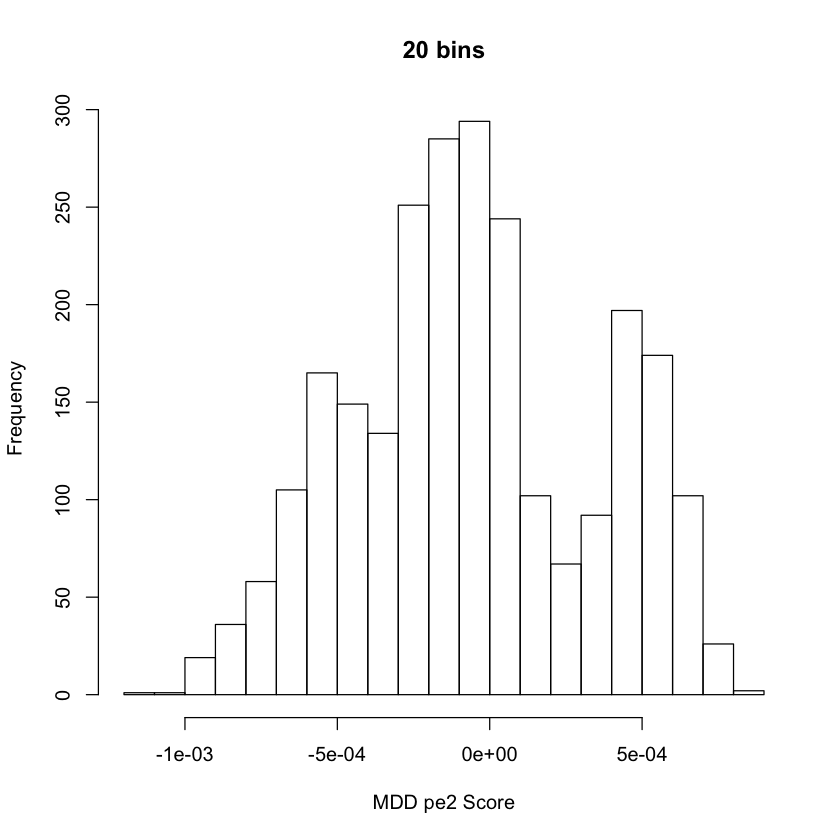

In [19]:
hist(dataset$SCORE, main="20 bins",xlab="MDD pe2 Score",breaks=20)

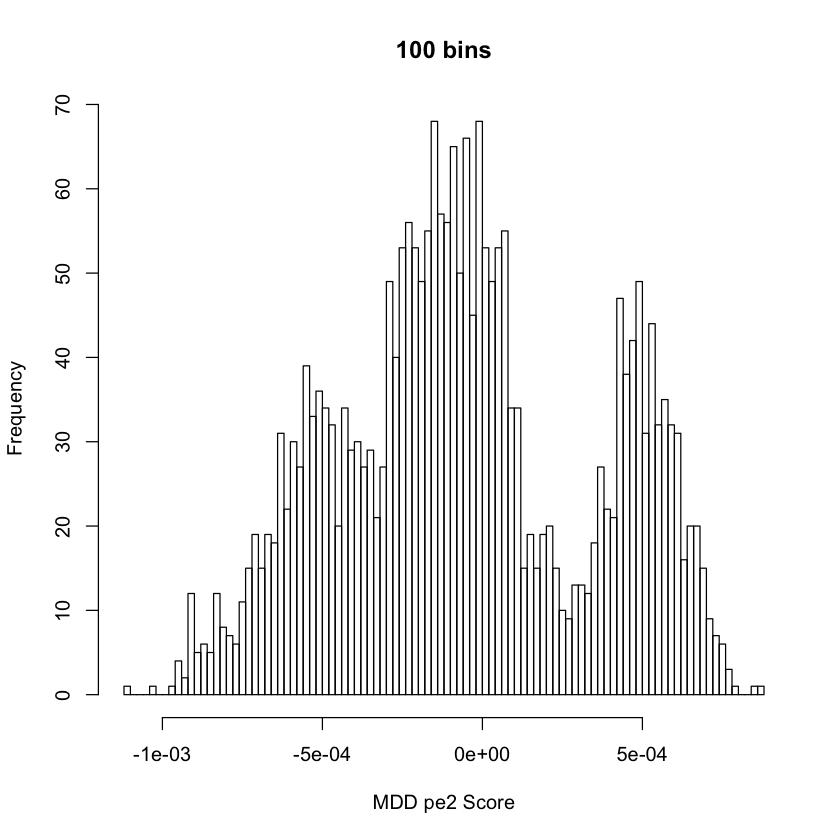

In [20]:
hist(dataset$SCORE,main="100 bins",xlab="MDD pe2 Score",breaks=100)

Recall that we can use density plots to compare case/control status for polygenic risk load. 

In [21]:
## calculating the density function
noResponse <- density(dataset[dataset$PHENO==1,]$SCORE)
Response <- density(dataset[dataset$PHENO==2,]$SCORE)

In [22]:
## calculate the range for the plot
xlim <- range(noResponse$x, Response$x)
ylim <- range(0, noResponse$y, Response$y)

In [23]:
#pick the colours
noResponseCol <- rgb(1,0,0,0.2)
ResponseCol <- rgb(0,0,1,0.2) 

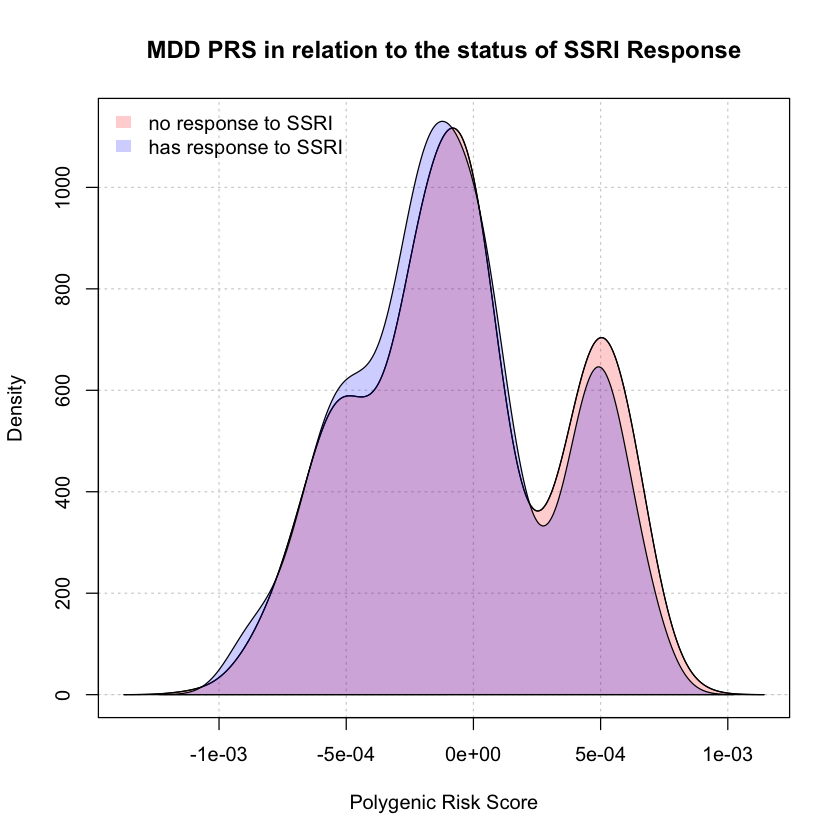

In [24]:
## plot the no response plot and and set up most of the plot parameters
plot(noResponse, xlim = xlim, ylim = ylim, xlab = 'Polygenic Risk Score',
     main = 'MDD PRS in relation to the status of SSRI Response', 
     panel.first = grid())

#put our density plots in
polygon(noResponse, density = -1, col = noResponseCol)
polygon(Response, density = -1, col = ResponseCol)

## add a legend in the corner
legend('topleft',c('no response to SSRI','has response to SSRI'),
       fill = c(noResponseCol, ResponseCol), bty = 'n',
       border = NA)

### What do you think?

Is there a difference/shift in one of the groups? If yes, do you think it would imply a potential polygenic risk load?

### Analysis of PRS? Yes/No? 

Now that we see some slight difference, is there a statistical way to analyse this?

Why, yes! With something known as a regression analysis. A regression analysis allows us to test for whether a trait is associated with the PRS that we computed. 

We can then report a p-value to see if the PRS is statistically significantly associated with the trait. In this case, "**is MDD PRS associated with SSRI response?"**.

## Step 3.2 Capturing ancestry differences in human
##### (Timing Check)

Humans are different from each other! We need to control for this so that we can improve accuracy of modeling the trait that we plan on modeling.

To capture this, we use something known as principal components that were have already precomputed (or we did it in our workshop today).

In [25]:
# Read the PC file into a file called 'pca'
pca <- read.table("OUTCOME/PCA_20_for_1000_Genomes.eigenvec")

# Provide the column names with this command.
names(pca) <- c("FID","IID",paste0("PC",1:20))

# Merge the polygenic score file (dataset) and the pca file (pca). Merging will be based on the "FID" and "IID" columns.
dataset <- merge(dataset,pca,by=c("FID","IID"))

## Step 3.3 PRS Analysis

Now that we have loaded the principal components, we can finally model our data (to find the association) for
     "**is MDD PRS associated with SSRI response?"**.

We will be using something called a logistic regression analysis. Logistic because the trait that we are testing is a yes/no (binary/dichotomous). A regression analysis, in short would allow us to test whether there is an association of PRS to SSRI response.


We will run two regression analyses. 

The first will include the polygenic score as the outcome, adjusting for population ancestry (using 10 PCs), and the variable that we are interested in which is PRS (SCORE):

In [26]:
Fullmodel <- glm(data = dataset, PHENO-1 ~ SCORE + PC1 + PC2 + PC3 + PC4 + PC5 +
                   PC6 + PC7 + PC8 + PC9 + PC10, family = "binomial")

The second model only includes 10 PCs and _excludes_ (reduced) the PRS (SCORE). 

Why? We will need to use this for a later analysis in order to see what heritability (trait differences) are we estimating from the PRS

Later we will calculate how much phenotypic variance is explained by the full model (PRS + PCs) and how much phenotypic variance is explained by the reduced model (PCs only).  

The difference in variance explained between the two models is the amount of variance explained by the polygenic score term. Other than association of a tested trait, this is the primary question that is usually asked in a polygenic scoring study. 

In [27]:
Reducedmodel <- glm(data = dataset, PHENO-1 ~ PC1 + PC2 + PC3 + PC4 + PC5 +
                      PC6 + PC7 + PC8 + PC9 + PC10, family = "binomial")

Let's examine the models

In [28]:
summary(Fullmodel)


Call:
glm(formula = PHENO - 1 ~ SCORE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10, family = "binomial", data = dataset)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.249  -1.179  -1.060   1.175   1.307  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -0.04311    0.04307  -1.001    0.317
SCORE       -111.72604  289.59694  -0.386    0.700
PC1           -3.30588    4.91131  -0.673    0.501
PC2           -0.68915    3.43034  -0.201    0.841
PC3            0.48982    2.22353   0.220    0.826
PC4           -0.06881    2.19792  -0.031    0.975
PC5           -0.38738    2.00784  -0.193    0.847
PC6           -0.89865    2.00377  -0.448    0.654
PC7           -1.61608    2.00859  -0.805    0.421
PC8            1.27905    2.01003   0.636    0.525
PC9            0.60880    2.00185   0.304    0.761
PC10          -1.60740    2.00765  -0.801    0.423

(Dispersion parameter for binomial family taken to be 1)

    Null devianc

In [29]:
summary(Reducedmodel)


Call:
glm(formula = PHENO - 1 ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + 
    PC7 + PC8 + PC9 + PC10, family = "binomial", data = dataset)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.236  -1.179  -1.063   1.175   1.301  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.03700    0.04004  -0.924   0.3555  
PC1         -5.03497    2.00970  -2.505   0.0122 *
PC2          0.38581    2.00101   0.193   0.8471  
PC3          0.86421    2.00060   0.432   0.6658  
PC4          0.28212    2.00081   0.141   0.8879  
PC5         -0.45073    2.00105  -0.225   0.8218  
PC6         -0.93826    2.00109  -0.469   0.6392  
PC7         -1.63442    2.00798  -0.814   0.4157  
PC8          1.26208    2.00949   0.628   0.5300  
PC9          0.60320    2.00171   0.301   0.7632  
PC10        -1.66414    2.00219  -0.831   0.4059  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null

## Step 3.4 Phenotype/ Trait Variance that is explained by PRS

Let's now calculate the phenotype / trait variance (that's sometimes also known as heritability) explained by the polygenic scoring 'SCORE' term.

We will be using a function from a package that we initially loaded. The package is called `fmsb` and the function that we will be using is called `NagelkerkeR2`. 

Nagelkerke's R<sup>2</sup> is a metric that we use to explain how much of a trait tested is measured by PRS. This ranges from 0-1. 

We would usually hope and pray and wish it's as close to 1 but in reality, as we covered at the top of this workshop -- barely 20% is ever explained!

This command now calculates Nagelkerke's R<sup>2</sup>. The subsequent command extracts just the R<sup>2</sup> value.

In [30]:
Fullmodel.rsquare <- NagelkerkeR2(Fullmodel)[[2]]
Fullmodel.rsquare

[1] 0.004677375

Similarly, let's compute Nagelkerke's R<sup>2</sup> for the reduced model

In [31]:
Reducedmodel.rsquare <- NagelkerkeR2(Reducedmodel)[[2]]
Reducedmodel.rsquare

[1] 0.00459838

Each of the values above explain variances in each model. 
Now, the rationale behind using reduced vs full model comes in.

We will take the difference between the two models to see how much is the variance being explained by MDD PRS to SSRI Response.

Let's now compute the R<sup>2</sup> difference between the models.

In [32]:
diff.rsquare <- Fullmodel.rsquare -  Reducedmodel.rsquare

## Step 3.5 Results (FINALLY)

Let's now pull all of the results into one file so that we understand what our data is telling us.

First, we will obtain the full model's (including PRS) effect size and p-value for the polygenic score term. Note, again, that this is not significant.

In [33]:
Estimate <- coef(summary(Fullmodel))[2,c(1,4)]

Next, we will place these values into a `results` file that contains the difference in R<sup>2</sup> `diff.rsquare`

In the subsequent `names(results)` line, we can name column headers manually in order to improve clarity. 

In [34]:
results <- as.data.frame(cbind(Estimate[1],Estimate[2],diff.rsquare))
names(results) <- c("OR","p-value","NagelkerkeR2")

So, what is the summary of our results?

_**drum roll please**_

In [35]:
results

,OR,p-value,NagelkerkeR2
Estimate,-111.726,0.699646,7.899513e-05


# Breakout session


If we have the time, we will try out some practical assignments that we do in genetics.

As we eluded to earlier, the variance explained by PRS towards a trait is one of our primary goals. Based on the model that you have ran with the `pe2` tranche, we noticed an R<sup>2</sup> of 7.899513 x 10<sup>-5</sup>.

Do you think that this will _increase_ when we loosen up the threshold i.e. use `pe05`, `pe10`? 

&emsp; This would allow **more SNPs** to be used as reference from the reference data into our test data.

Do you think that this will _decrease_ if we make this threshold more stringent i.e. use `pe4`, `pe6`? 

&emsp; This would allow **less SNPs** to be used as reference from the reference data into our test data.


Let's test this out!

## Breakout room 1: Testing the INCREASE in p-value tranche threshold

Use `pe10`

File to use: `OUTCOME/MDD.P10.profile`



## Breakout room 2: Testing the DECREASE in p-value tranche threshold

Use `pe4`

File to use: `OUTCOME/MDD.pe4.profile`

## What do you have to do?

1) Introduce yourselves! 

2) Identify a note-taker (and a back up, just in case). This person will also share their screen with the group for code reviewing.

3) Identify a reporter who will share your group’s responses with the larger group.
  
&emsp; Kumar will pop in and out of your rooms to check in; please use the “Ask for Help” button to bring Kumar into your group as and when needed 

### Steps-by-step guide

1) Copy and paste the analysis steps for **Step 3** (Steps 3.1 through 3.5) into separate cells below this cell. _**OR**_ you can just edit the above cells. It's really up to you! 

2) Choose the appropriate files to run your analysis. All you would have to do is substitute with the appropriate p-value tranche threshold that you were assigned. The command that you would edit is 
`dataset <- read.table("OUTCOME/MDD.pe2.profile",header=T)`

3) Within your group, discuss the 

&emsp; 3.1) [effect size](https://www.simplypsychology.org/effect-size.html#:~:text=Cohen%20suggested%20that%20d%3D0.2,if%20it%20is%20statistically%20significant.) and p-value contributed by the MDD PRS to SSRI response

&emsp; 3.2) Is the effect size the same? 

&emsp; 3.3) More importantly, what is the Nagelkerke's R<sup>2</sup> and how does it compare to `pe2`? What do you think this means?

&emsp; 3.4) Can genetics be any more complex than this?  _groan_

_We will broadcast a 2-minute warning when it’s time to start wrapping up._


4) Present your group's work by sharing the screen of your reporter. _Each group will have 3-5 minutes to share their discussion points._ 